# Predicting Student Depression

Name : Darryn Johnson

Date Last Updated : 3/19/2025

## Sources and Links

Original Kaggle Dataset : [Student Depression Dataset](https://www.kaggle.com/datasets/hopesb/student-depression-dataset/data)

Github Repository : [predicting_student_depression](https://github.com/Djohnson1313/predicting_student_depression)

Dataset Metadata : 

`CHRISP-DM` explination and image : [IBM](https://www.ibm.com/docs/en/spss-modeler/saas?topic=dm-crisp-help-overview)

---

# Overview

- title

- author information

- sources and links

- overview

- imports

- business understanding

- data preparation

- data understanding

- data distribution

- functions

- explority data analysis
    - gender

---
## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv('student_depression_data.zip')

In [3]:
df.head(3)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


# Business Understanding 

The purpose of the following notebook is to look into the factors that could lead to a student being depressed, and create a model to predict whether or not a specifc individual is likely to be depressed. This model is intedned for use by therapists or school faculty to automate the beginning phase of working with a student that is depressed.

- business objectives
    - create a model that accuratly predcits if an individual is depressed.
- situation assesment
    - resources available
        - data regarding the specifc student
    - resources unavailable
        - wheather the target variable is decided by a physician or is self diagnosed
        - the original dataset owner mentions the data is synthetic, but the above statement still holds value in a real dataset
        - nationality
- data mining goals
    - assess and understand the data provided
- project plan
    - clean the data and remove unnecessary datapoints
    - analyize the data to ensure a thorough understanding
    - prep data for modeling
    - model the data
        - rework data and the model if needed to ensure high quality
        - run model again and repeat until satisfactory

# Data Preparation

The purpose of the following cells is to prep the data for EDA. This section will not enclude data manipulation for the actual modeling itself; that will take place in the model preparation section. 

In [4]:
# this line of code removes the outliers of age in the dataset
df = df[df['Age'] <= 34]

In [5]:
# this line of code removes entries that are not students, as non-student entries are a very small minority
df = df[df['Profession'] == 'Student']

In [6]:
# this line of code renames a column to a shorter name
df = df.rename(columns = {'Have you ever had suicidal thoughts ?' : 'Suicidal Thoughts'})

In [7]:
# this line of code renames a column to a shorter name
df = df.rename(columns = {'Family History of Mental Illness' : 'Family Illness'})

---
# Data Understanding 

This data was dowloaded from [Kaggle](https://www.kaggle.com/) and is a sythetic datast created by the author. The data is as follows :

- data properties
    - the original dataset contains 27,900 rows, with each row representing an individual student
    - the original dataset contains 18 columns such as gender, age and degree.
        - the breakdown of these data points are available in [dataset_metadata.ipynb](https://github.com/Djohnson1313/predicting_student_depression/blob/main/dataset_metadata.ipynb)

---
# Data Distribution

Let's take a quick look into the distribution of the data we will be working with. 

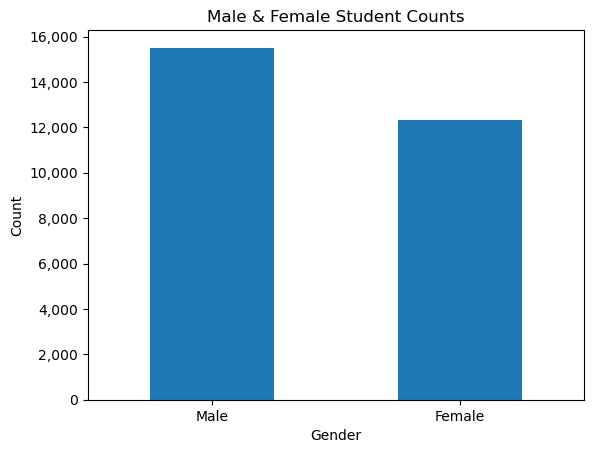

In [8]:
fig, ax = plt.subplots()

gender_bar = df['Gender'].value_counts()
gender_bar.plot(kind = 'bar', rot = 'horizontal')
ax.set_title('Male & Female Student Counts')
ax.set_ylabel('Count')

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

plt.show();

In [9]:
len(df[df['Gender'] == 'Male']) - len(df[df['Gender'] == 'Female'])

3197

Here we can see that thee are 3,197 more males in this dataset than females.

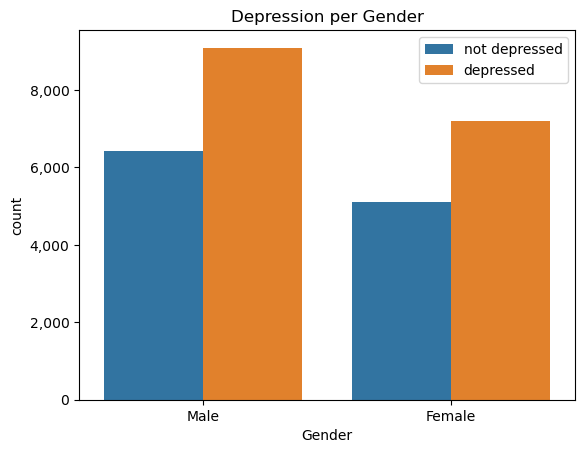

In [10]:
fig, ax = plt.subplots()

sns.countplot(data = df, x = 'Gender', hue = 'Depression')
ax.set_title('Depression per Gender')
plt.legend(['not depressed', 'depressed'])

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

plt.show();

In [11]:
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

m_dep = df_male[df_male['Depression'] == 1]
f_dep = df_female[df_female['Depression'] == 1]

len(m_dep) - len(f_dep)

1893

Breaking down depression by gender, we see that males report more depression than females.

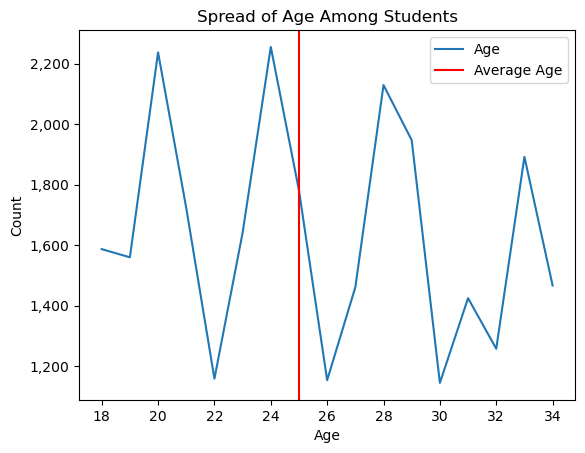

In [12]:
fig, ax = plt.subplots()


age_line = df['Age'].value_counts().sort_index()
age_line.plot()

avg = math.floor(sum(df['Age']) / len(df['Age']))
ax.axvline(avg, color = 'r')

ax.set_title('Spread of Age Among Students')
ax.set_ylabel('Count')

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

plt.legend(['Age','Average Age'])

plt.show();

Here we see our spread of ages, with the average age being 25.

---
## Functions

The following cells contain all of the functions used within the notebook, and will have a short breakdown of what the function does in the sections they are used in.

In [70]:
def percent_compare(col):

    '''
    ---
    this function calculates the percentage difference between the 2 genders for each rating in the given column.
    ---
    requirements : col(str). the given column must also contain a 1-5 rating system.
    ---
    example : perecnt_compare("Academic Pressure").
    ---
    '''

    # create df's that contain only 1 gender
    male_df = df[df['Gender'] == 'Male'] # male df
    fmale_df = df[df['Gender'] == 'Female'] # female df

    # create df with only given gender & given column
    male_col = male_df[col].value_counts().sort_index() # male df & column
    fmale_col = fmale_df[col].value_counts().sort_index() # female df & column

    # create empty male dictionary to add key, value pairs to
    dict_male = {}

    # for loop to add male key, value pairs to dictionary
    for ind, val in male_col.items():
        dict_male[ind] = val

    # create empty female dictionary to add key, value pairs to
    dict_fmale = {}

    # for loop to add female key, value pairs to dictionary
    for ind,val in fmale_col.items():
        dict_fmale[ind] = val

    # turn dictionary into list so each key and vale can be accessed independently from each other for males
    keys_list_m = list(dict_male.keys()) # male key list
    val_list_m = list(dict_male.values()) # male value list

    # turn dictionary into list so each key and vale can be accessed independently from each other for females
    keys_list_f = list(dict_fmale.keys())# female key list
    val_list_f = list(dict_fmale.values())# female value list
    
    # calculate perecent difference for each individual key, value pair to compare male / female values 
    avg_0 = round(((abs(val_list_m[0] - val_list_f[0])) / ((val_list_m[0] + val_list_f[0]) / 2) * 100), 2) # perecnt difference for key, val 0
    avg_1 = round(((abs(val_list_m[1] - val_list_f[1])) / ((val_list_m[1] + val_list_f[1]) / 2) * 100), 2) # perecnt difference for key, val 1
    avg_2 = round(((abs(val_list_m[2] - val_list_f[2])) / ((val_list_m[2] + val_list_f[2]) / 2) * 100), 2) # perecnt difference for key, val 2
    avg_3 = round(((abs(val_list_m[3] - val_list_f[3])) / ((val_list_m[3] + val_list_f[3]) / 2) * 100), 2) # perecnt difference for key, val 3
    avg_4 = round(((abs(val_list_m[4] - val_list_f[4])) / ((val_list_m[4] + val_list_f[4]) / 2) * 100), 2) # perecnt difference for key, val 4

    # output
    return f'males have a total of {val_list_m[0]} for {keys_list_m[0]}, while females have a total of {val_list_f[0]}. this is a difference of {avg_0}%. \nmales have a total of {val_list_m[1]} for {keys_list_m[1]}, while females have a total of {val_list_f[1]}. this is a difference of {avg_1}%. \nmales have a total of {val_list_m[2]} for {keys_list_m[2]}, while females have a total of {val_list_f[2]}. this is a difference of {avg_2}%.\nmales have a total of {val_list_m[3]} for {keys_list_m[3]}, while females have a total of {val_list_f[3]}. this is a difference of {avg_3}%.\nmales have a total of {val_list_m[4]} for {keys_list_m[4]}, while females have a total of {val_list_f[4]}. this is a difference of {avg_4}%.'

In [71]:
def get_avg(gender, col):

    '''
    ---
    this function creates a df with only the given gender and column, and finds the mean of the newly created df.
    ---
    requirements : gender(str) & col(str). the given column must also contain a 1-5 rating system.
    ---
    example : get_avg("Male", "Academic Pressure").
    ---
    '''
    
    gender_frame = df[df['Gender'] == gender]
    col_sum = sum(gender_frame[col])
    col_len = len(gender_frame[col])

    avg = round((col_sum / col_len), 2)
    
    return f'the mean for {col} for {gender}s is {avg}'

In [72]:
def avg_across_genders(col):

    '''
    ---
    this function finds the average rating for the 2 genders in the given column.
    ---
    requirments : col(str). the given column must also contain a 1-5 rating system.
    ---
    example : avg_across_genders("Academic Pressure")
    ---
    '''
    
    male_df = df[df['Gender'] == 'Male']
    fmale_df = df[df['Gender'] == 'Female']

    male_col = male_df[col]
    fmale_col = fmale_df[col]

    male_sum = sum(male_col)
    male_len = len(male_col)
    male_avg = round((male_sum / male_len), 2)

    fmale_sum = sum(fmale_col)
    fmale_len = len(fmale_col)
    fmale_avg = round((fmale_sum / fmale_len), 2)

    if male_avg > fmale_avg:
        number_above = male_avg
        number_below = fmale_avg
    elif male_avg < fmale_avg:
        number_above = fmale_avg
        number_below = male_avg
    else:
        number_above = 0
        number_below = 0
    
    avg = round(((number_above - number_below) / ((number_above + number_below) / 2) * 100), 2)

    return f'the average rating across both genders for {col} is {avg}'

---
# Exploritory Data Analysis (EDA)

Now we have seen some of the distributions of data, let's take a deeper look into some of the data and what it it means.

In [14]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


## Gender

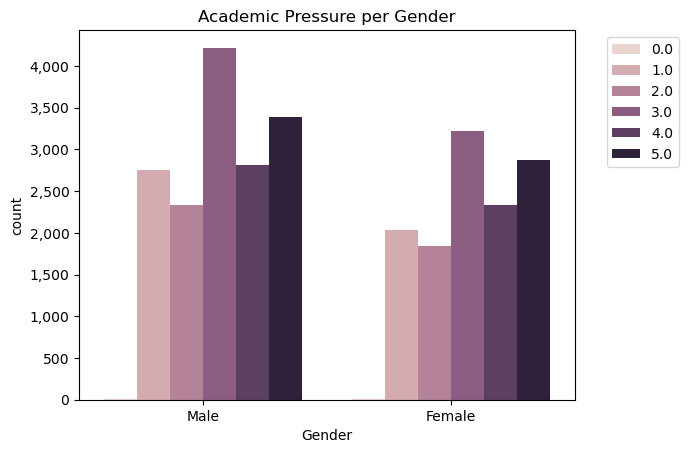

In [15]:
fig, ax = plt.subplots()

sns.countplot(data = df, x = 'Gender', hue = 'Academic Pressure')

ax.set_title('Academic Pressure per Gender')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

plt.show();

Here we can see that males have more reports then the females, however this results in a similar mean when averaged out, resulting in females having a 0.07 higher average academic pressure rating.

Function Utilized :

- `percent_compare`
    - calculates the perecent difference for each rating 

In [60]:
print(percent_compare('Academic Pressure'))

males have a total of 3 for 0.0, while females have a total of 4. this is a difference of 28.57%. 
males have a total of 2750 for 1.0, while females have a total of 2037. this is a difference of 29.79%. 
males have a total of 2329 for 2.0, while females have a total of 1843. this is a difference of 23.3%.
males have a total of 4218 for 3.0, while females have a total of 3220. this is a difference of 26.84%.
males have a total of 2816 for 4.0, while females have a total of 2330. this is a difference of 18.89%.


Function Utilized :
- `get_avg`
    - finds the average for the given gender and column

In [20]:
get_avg('Male', 'Academic Pressure')

'the mean for Academic Pressure for Males is 3.11'

In [21]:
get_avg('Female', 'Academic Pressure')

'the mean for Academic Pressure for Females is 3.18'

In [56]:
avg_across_genders('Academic Pressure')

'the average rating across both genders for Academic Pressure is 2.23'

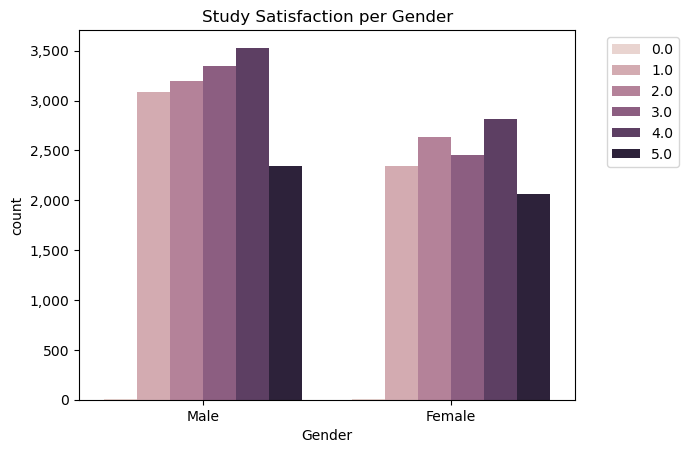

In [25]:
fig, ax = plt.subplots()

sns.countplot(data = df, x = 'Gender', hue = 'Study Satisfaction')

ax.set_title('Study Satisfaction per Gender')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

plt.show();

In [61]:
print(percent_compare('Study Satisfaction'))

males have a total of 4 for 0.0, while females have a total of 5. this is a difference of 22.22%. 
males have a total of 3089 for 1.0, while females have a total of 2346. this is a difference of 27.34%. 
males have a total of 3195 for 2.0, while females have a total of 2634. this is a difference of 19.25%.
males have a total of 3343 for 3.0, while females have a total of 2456. this is a difference of 30.59%.
males have a total of 3530 for 4.0, while females have a total of 2812. this is a difference of 22.64%.


In [62]:
get_avg('Male', 'Study Satisfaction')

'the mean for Study Satisfaction for Males is 2.93'

In [63]:
get_avg('Female', 'Study Satisfaction')

'the mean for Study Satisfaction for Females is 2.97'

In [64]:
avg_across_genders('Study Satisfaction')

'the average rating across both genders for Study Satisfaction is 1.36'

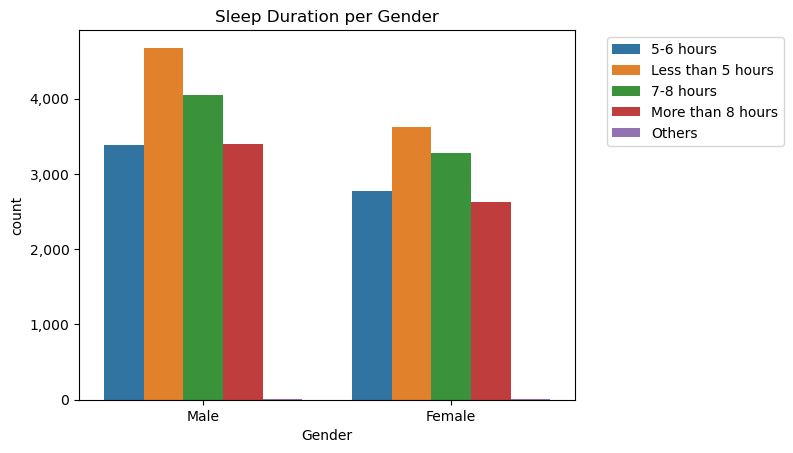

In [26]:
fig, ax = plt.subplots()

sns.countplot(data = df, x = 'Gender', hue = 'Sleep Duration')

ax.set_title('Sleep Duration per Gender')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

plt.show();

In [65]:
print(percent_compare('Sleep Duration'))

males have a total of 3381 for 5-6 hours, while females have a total of 2778. this is a difference of 19.58%. 
males have a total of 4048 for 7-8 hours, while females have a total of 3277. this is a difference of 21.05%. 
males have a total of 4675 for Less than 5 hours, while females have a total of 3619. this is a difference of 25.46%.
males have a total of 3396 for More than 8 hours, while females have a total of 2629. this is a difference of 25.46%.
males have a total of 9 for Others, while females have a total of 9. this is a difference of 0.0%.


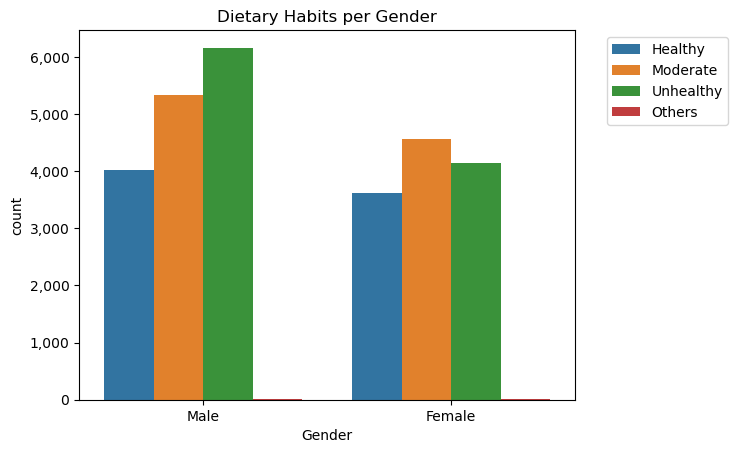

In [27]:
fig, ax = plt.subplots()

sns.countplot(data = df, x = 'Gender', hue = 'Dietary Habits')

ax.set_title('Dietary Habits per Gender')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

plt.show();

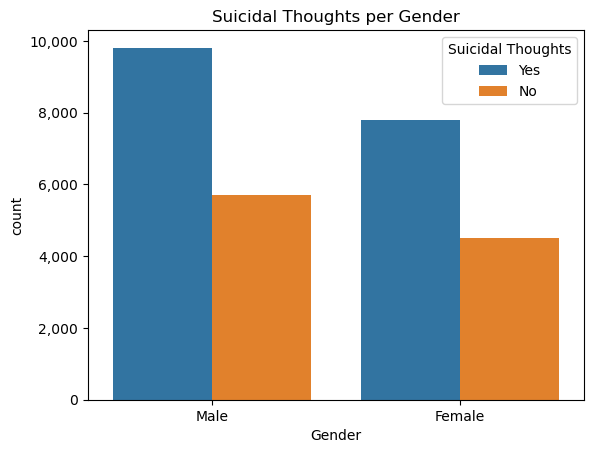

In [28]:
fig, ax = plt.subplots()

sns.countplot(data = df, x = 'Gender', hue = 'Suicidal Thoughts')

ax.set_title('Suicidal Thoughts per Gender')

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

plt.show();

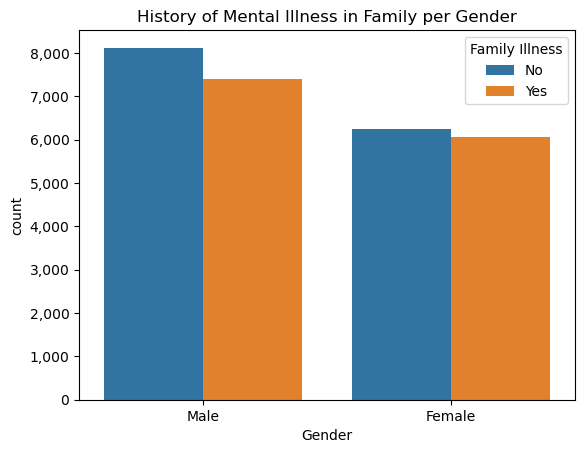

In [29]:
fig, ax = plt.subplots()

sns.countplot(data = df, x = 'Gender', hue = 'Family Illness')

ax.set_title('History of Mental Illness in Family per Gender')

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

plt.show();